In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

Загружаем текст и очищаем

In [3]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

In [4]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [5]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [8]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [9]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [10]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

###Матрица переходных вероятностей

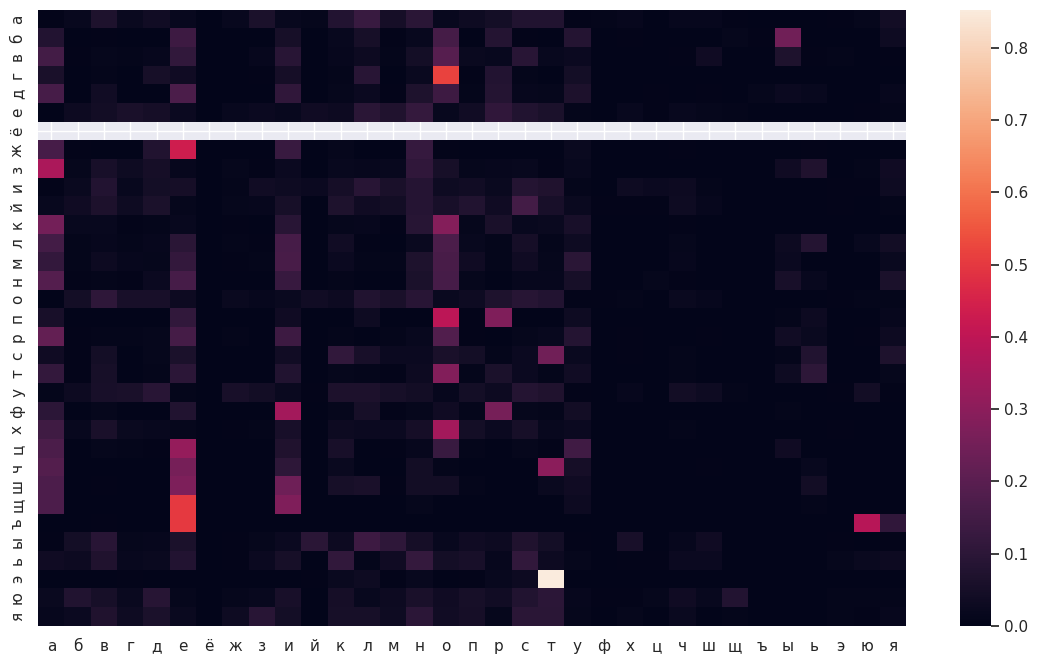

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

###вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [12]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)

паар 3.320148995565429e-07
пабр 2.525698668649906e-06
павр 1.958708325259586e-06
пагр 2.607851118757999e-06
падр 5.101928579925251e-06
паер 3.1854396510547073e-06
пазр 1.3380908036584488e-06
паир 6.568983296651096e-07
пайр 6.318931835212936e-07
пакр 7.507796670676969e-06
палр 1.48647696683268e-06
памр 6.753718462543877e-07
панр 3.9074595435369233e-07
паор 1.9714446787429537e-06
папр 1.4368284084714276e-05
парр 1.468912370682861e-07
паср 1.1537281091341106e-06
патр 7.48051002246007e-06
паур 3.1524121233928266e-07
пафр 3.5627564079387166e-06
пахр 6.336253572706697e-07
пацр 4.1969188261773895e-09
пачр 6.145026667522778e-08
пашр 1.452994175691034e-08
пащр 7.1678696329314216e-09
паэр 1.3182106122148515e-07
паюр 6.620403098695964e-07
паяр 9.031101789056359e-07
пбар 7.721810204628342e-09
пббр 3.692695536236849e-10
пбвр 1.3123195501267196e-10
пбгр 2.2182497934559213e-10
пбдр 2.093012338037798e-10
пбер 3.2212051147672714e-08
пбзр 6.282547934330356e-12
пбир 2.47914029790264e-09
пбкр 2.2884972064

сгенерируем слово, начинающееся с буквы «Б» длиной восемь символов.

In [13]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бымкаяжва


Выберем ряд с колебанием температур

In [14]:
series = pd.read_csv('mean-monthly-air-temperature-deg.csv')['Deg']

In [15]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.1 MB/s eta 0:00:00


In [16]:
from hmmlearn.hmm import GaussianHMM

In [17]:
values = series.values.reshape(-1,1)

Подбираем оптимальное количество компонентов для HMM. Если смотреть на score, то на мой взгляд, оптимально значение 11

In [18]:
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -855.6201905961935
2 -767.930267699346
3 -737.9601729418893
4 -698.3551392698463
5 -659.6295034183821
6 -654.2900642588866
7 -639.6495706665139
8 -658.7609042055227
9 -618.0990209398726
10 -628.0793302805425
11 -576.0549612124368
12 -556.3103476903713
13 -572.9457315043414


14 -539.6829840475631
15 -566.4421219585549


16 -542.2091001482534


17 -559.469267495093


18 -520.9576336215606
19 -569.9733199824232


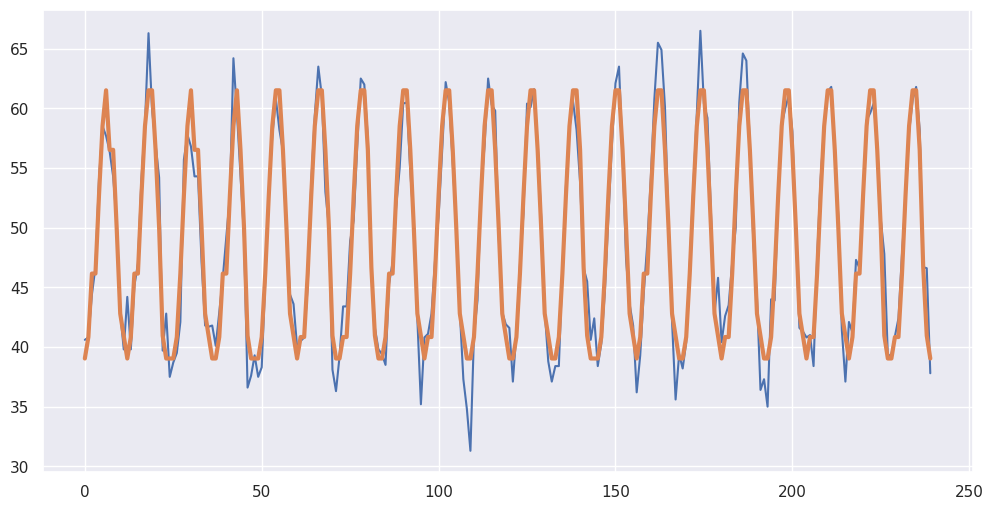

In [31]:
model = GaussianHMM(n_components=11,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [32]:
cur_value = labels[-1]
predictions = []
for _ in range(11):
    cur_value = np.random.choice(11, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [33]:
series1 = np.concatenate((values, np.array(predictions)))

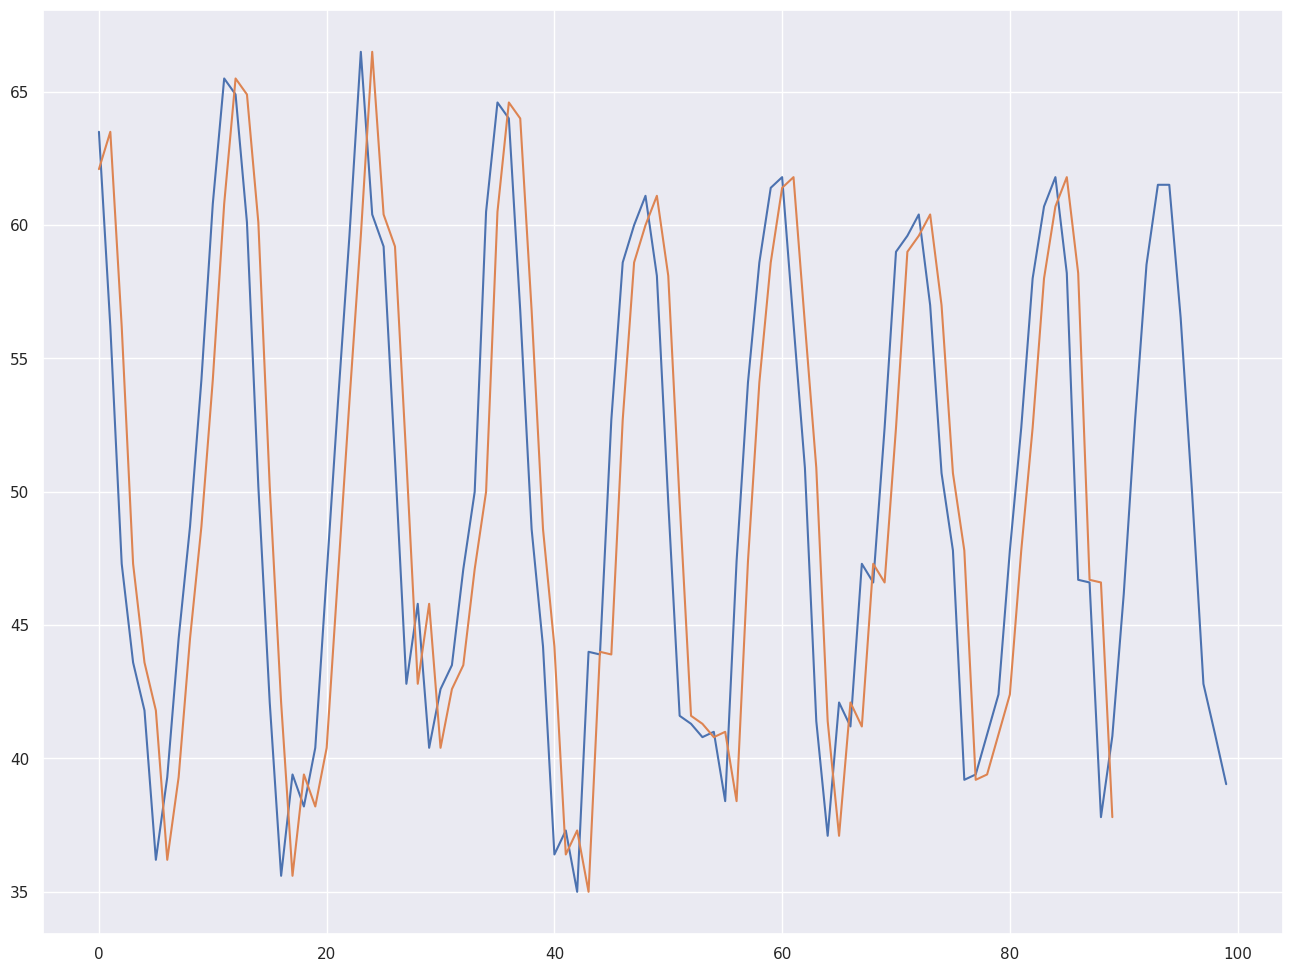

In [34]:
plt.figure(figsize=(16,12))
plt.plot(series1[-100:])
plt.plot(values[-90:])
plt.show()